In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/data.csv', error_bad_lines=False)

df.head(2)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [ ]:
len(df)

18207

In [ ]:
df['Jersey Number'].unique()

array([10.,  7.,  1.,  9., 15.,  8., 21., 13., 22.,  5.,  3., 14., 12.,
       11.,  2., 23., 26.,  6., 17., 18.,  4., 19., 31., 25., 37., 30.,
       44., 29., 24., 20., 16., 33., 28., 27., 77., 47., 38., 40., 92.,
       36., 87., 34., 32., 83., 70., 35., 89., 56., 99., 57., 91., 86.,
       45., 63., 39., 43., 42., 93., 72., 71., 88., 55., 80., 50., 66.,
       60., 73., 67., 74., 69., 76., 41., 90., 46., 75., 79., 62., 81.,
       61., 49., 95., 53., 96., 97., 68., 98., 94., 58., 78., nan, 48.,
       52., 54., 84., 82., 65., 64., 51., 59., 85.])

In [ ]:
df['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', nan], dtype=object)

In [ ]:
df['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa', nan],
      dtype=object)

In [ ]:
df['Club'].nunique()

651

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

# Data Cleaning 

Setting Value ,Wage and Release Clause columns to be of a numeric type: 

In [ ]:
df['Value']=df['Value'].str.replace('K', '000')
df['Value']=df['Value'].str.replace('€', '')
df['Value']=df['Value'].str.replace('M', '000000')

df=df[~df['Value'].str.contains('\+')]
df.head(2)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110.5000000,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [ ]:
df['Wage']=df['Wage'].str.replace('K', '000')
df['Wage']=df['Wage'].str.replace('€', '')
df['Wage']

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: Wage, Length: 18207, dtype: object

In [ ]:
df['Release Clause']=df['Release Clause'].str.replace('K', '000')
df['Release Clause']=df['Release Clause'].str.replace('€', '')
df['Release Clause']=df['Release Clause'].str.replace('M', '000000')
df['Release Clause']

0        226.5000000
1        127.1000000
2        228.1000000
3        138.6000000
4        196.4000000
            ...     
18202         143000
18203         113000
18204         165000
18205         143000
18206         165000
Name: Release Clause, Length: 18207, dtype: object

age-salary

In [ ]:
df.loc[df['Wage'].str.match(r'^€.*K$')==False,'Wage']

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: Wage, Length: 18207, dtype: object

In [ ]:
df['Value']=pd.to_numeric(df['Value'])

In [ ]:
df['Wage']=pd.to_numeric(df['Wage'])

In [ ]:
df['Release Clause']=pd.to_numeric(df['Release Clause'])

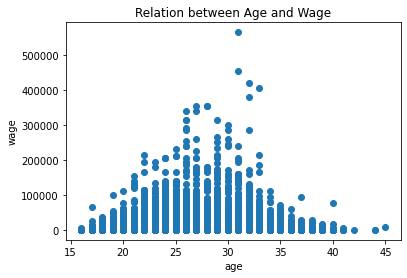

In [ ]:
plt.scatter(x=df['Age'], y=df['Wage']);
plt.xlabel('age');
plt.ylabel('wage');
plt.title('Relation between Age and Wage');

In [ ]:
df['Overall']=pd.to_numeric(df['Overall'])

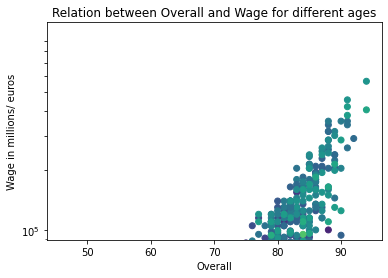

In [ ]:
plt.scatter(x=df['Overall'], y=df['Wage'], c=df['Age']);
plt.yscale("log") 
plt.yticks(np.arange(100000, 1000000, step=100000))


plt.xlabel('Overall');
plt.ylabel('Wage in millions/ euros');
plt.title('Relation between Overall and Wage for different ages');

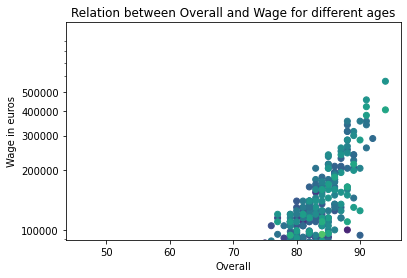

In [ ]:
plt.scatter(x=df['Overall'], y=df['Wage'], c=df['Age']);
plt.yscale("log") 
plt.yticks([100000,200000,300000,400000, 500000],[100000,200000,300000,400000, 500000]);

plt.xlabel('Overall');
plt.ylabel('Wage in euros');
plt.title('Relation between Overall and Wage for different ages');
plt.show()

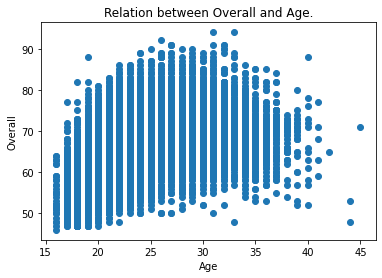

In [ ]:
plt.scatter(x=df['Age'], y=df['Overall']);
plt.xlabel('Age');
plt.ylabel('Overall');
plt.title('Relation between Overall and Age.');

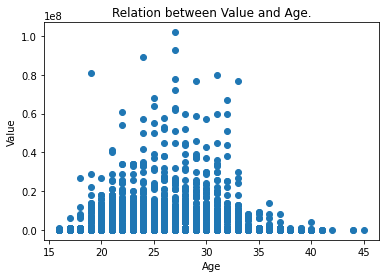

In [ ]:
plt.scatter(x=df['Age'], y=df['Value']);
plt.xlabel('Age');
plt.ylabel('Value');
plt.title('Relation between Value and Age.');

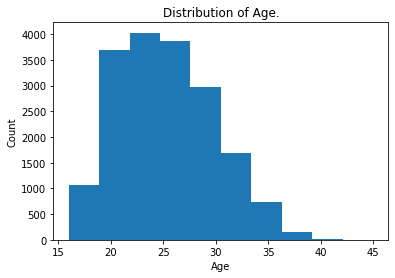

In [ ]:
plt.hist(df['Age'])
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Distribution of Age.');

# Hypothesis Testing


**H0: Preferred Foot does not affect the mean Overall.** </br>
**H1: Preferred Foot affects the mean Overall.**


In [ ]:
df['Preferred Foot'].unique()

array(['Left', 'Right', nan], dtype=object)

In [ ]:
df['Preferred Foot'].replace({'Left':0, 'Right':1}, inplace=True)

In [ ]:
df['Preferred Foot']=pd.to_numeric(df['Preferred Foot'])

(array([ 159.,  843., 1890., 3578., 3211., 2687., 1166.,  332.,   70.,
          12.]),
 array([46. , 50.8, 55.6, 60.4, 65.2, 70. , 74.8, 79.6, 84.4, 89.2, 94. ]),
 <a list of 10 Patch objects>)

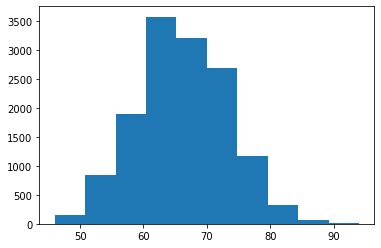

In [ ]:
right_overall_plt=df[(df['Preferred Foot']==1)]['Overall']
plt.hist(right_overall_plt)

(array([  48.,  196.,  569.,  949., 1301.,  792.,  215.,  113.,   26.,
           2.]),
 array([47. , 51.7, 56.4, 61.1, 65.8, 70.5, 75.2, 79.9, 84.6, 89.3, 94. ]),
 <a list of 10 Patch objects>)

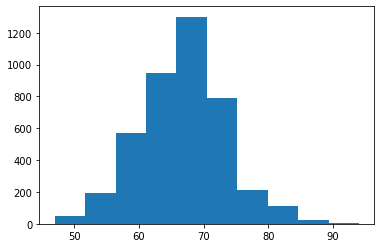

In [ ]:
left_overall_plt=df[(df['Preferred Foot']==0)]['Overall']
plt.hist(left_overall_plt)

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

# number of conversions with the old_page
overall_right =df[(df['Preferred Foot']==1)]['Overall']

# number of conversions with the new_page
overall_left = df[(df['Preferred Foot']==0)]['Overall']

ztest(overall_right, overall_left, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)

(-5.911803381927974, 3.3838231579274163e-09)

The test statistic for the two sample z-test is -5.911803381927974 and the corresponding p-value is 0.0. </br>
Since this p-value is greater than .05, we can not reject the null hypothesis. In other words, the mean overall is not significantly different both groups( Right or Left foot).

In [ ]:
overall_left.mean(), overall_right.mean()

(66.80147233436239, 66.0833811299111)

# Confidence Interval test

Mean for overall 66.23869940132916


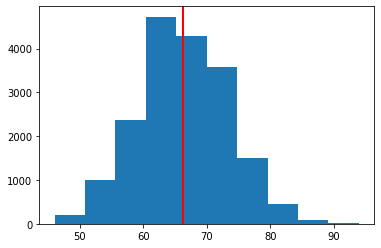

In [ ]:
plt.hist(df['Overall'])

plt.axvline(x=df['Overall'].mean(), color='r', linewidth=2)
print('Mean for overall', df['Overall'].mean())

**Confidence Interval for the difference in average of release clause player who have an overall greater than 65.76 and those who have an overall less than 65.76.**

In [ ]:
diff = []
for _ in range(10000):
    bootsample =df.sample(200, replace=True)
    mean_x1_overall = bootsample[bootsample['Overall'] >= 65.76]['Release Clause'].mean()
    mean_x2_overall = bootsample[bootsample['Overall'] < 65.76]['Release Clause'].mean()
    diff.append(mean_x1_overall - mean_x2_overall)

np.percentile(diff, 2.5), np.percentile(diff, 97.5)

(-147036.53438987248, 1789021.363240144)

(array([1291., 3777., 2654., 1262.,  585.,  246.,  125.,   37.,   17.,
           6.]), array([-343256.59494949,   33114.50013986,  409485.59522922,
         785856.69031857, 1162227.78540793, 1538598.88049728,
        1914969.97558664, 2291341.07067599, 2667712.16576535,
        3044083.2608547 , 3420454.35594406]), <a list of 10 Patch objects>)

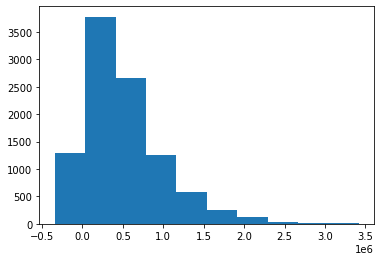

In [ ]:
plt.hist(diff)

**Confidence Interval of mean difference in the average release charges between players with overall greater than 65.7 and players with overall less than 65.7 is between -122256.52 and 2146943.04.** </br>
**Since the plot is skewed to the right, we can say that players with an overall greater than or equal to 65.76 tend to have higher average Release Clause.**

# Multiple Linear Regression

**Measuring the effect of height,weight, international reputation, and wage on the overall value.**

In [ ]:
df = df.dropna(subset=['Height', 'Weight'])

In [ ]:
def parse_ht(ht):
    # format: 7'0.0"
    ht_ = ht.split("'")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_+ in_) 

df['Height']=df['Height'].apply(lambda x:parse_ht(x))

In [ ]:
df['Height']=pd.to_numeric(df['Height'])

In [ ]:
df['Weight']=df['Weight'].str.replace('lbs', '')
df['Weight']

0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18159, dtype: object

In [ ]:
df['Weight']=pd.to_numeric(df['Weight'])
df['International Reputation']=pd.to_numeric(df['International Reputation'])

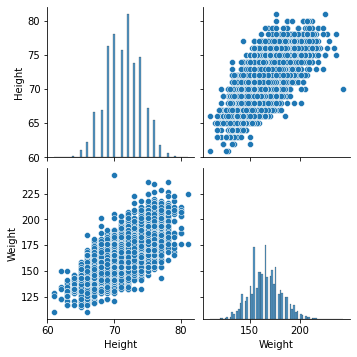

In [ ]:
import seaborn as sb
sb.pairplot(df[['Height','Weight']])

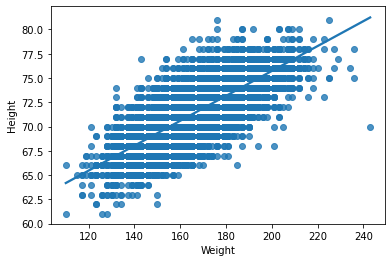

In [ ]:
sb.regplot(data =df, x = 'Weight', y = 'Height');
plt.xlabel('Weight');
plt.ylabel('Height');

Height and Weight columns are collinear. Hence we can't use both columns in the same linear regression model. 

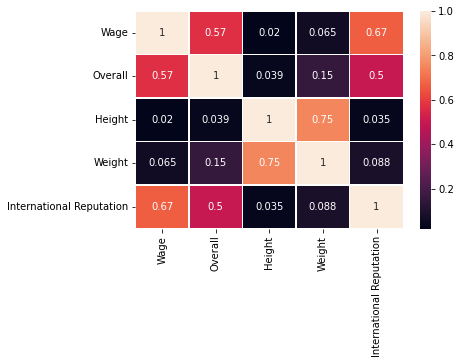

In [ ]:
corr=df.corr()
selected_columns = df[["Wage","Overall", "Height", "Weight", "International Reputation"]]
sns.heatmap(selected_columns.corr(),linewidths=.5, annot= True)

In [ ]:
df['intercept'] = 1
lm = sm.OLS(df['Wage'], df[['intercept','Overall','International Reputation', 'Height']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     6622.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:37:00   Log-Likelihood:            -2.0064e+05
No. Observations:               18159   AIC:                         4.013e+05
Df Residuals:                   18155   BIC:                         4.013e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                -8.276e+04   3208.652    -25.794      0.000   -8.91e+04   -7.65e+04
Overall                   1009.9245     18.862     53.544      0.000     972.954    1046.895
International Reputation  2.854e+04    330.948     86.241      0.000    2.79e+04    2.92e+04
Height                     -86.3742     42.668     -2.024      0.043    -170.007      -2.741
==============================================================================
Omnibus:                    21702.307   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7851783.693
Skew:                           5.968   Prob(JB):                         0.00
Kurtosis:                     104.168   Cond. No.                     2.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


**For every one unit increase in the height, we predict the Wage to decrease by 	86.3742.** </br>
**For every one unit increase in the International Reputation, we predict the Wage to increase by 2.85.** </br>
**Similarily, for every one unit increase in the Overall, we predict the Wage to increase by 1025.9546.** </br>

